<a href="https://colab.research.google.com/github/Jojocko/NLP-projects-/blob/main/Topic_modeling_Research_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Jojocko/NLP-projects-/main/topic_modeling_reasearch_articles(train_set).csv'

df = pd.read_csv(url)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,"Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diagnostic\nmanner, i.e. without information on condition presence. Reconstruction is posed\nas a Maximum-A-Posteriori problem with a prior model whose parameters are\nestimated from training data in a classifier-specific fashion. Experimental\nevaluation is performed on synthetically generated data and data from the\nAlzheimer's Disease Neuroimaging Initiative (ADNI) database. Results on\nsynthetic data demonstrate that using RSM yields higher detection accuracy\ncompared to using models directly or with bootstrap averaging. Analyses on the\nADNI dataset show that RSM can also improve correlation between\nsubject-specific detections in cortical thickness data and non-imaging markers\nof Alzheimer's Disease (AD), such as the Mini Mental State Examination Score\nand Cerebrospinal Fluid amyloid-$\beta$ levels. Further reliability studies on\nthe longitudinal ADNI dataset show improvement on detection reliability when\nRSM is used.\n",1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,"Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n",1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels for polyharmonic functions,"We introduce and develop the notion of spherical polyharmonics, which are a\nnatural generalisation of spherical harmonics. In particular we study the\ntheory of zonal polyharmonics, which allows us, analogously to zonal harmonics,\nto construct Poisson kernels for polyharmonic functions on the union of rotated\nballs. We find the representation of Poisson kernels and zonal polyharmonics in\nterms of the Gegenbauer polynomials. We show the connection between the\nclassical Poisson kernel for harmonic functions on the ball, Poisson kernels\nfor polyharmonic functions on the union of rotated balls, and the Cauchy-Hua\nkernel for holomorphic functions on the Lie ball.\n",0,0,1,0,0,0
3,4,A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,"The stochastic Landau--Lifshitz--Gilbert (LLG) equation coupled with the\nMaxwell equations (the so called stochastic MLLG system) describes the creation\nof domain walls and vortices (fundamental objects for the novel nanostructured\nmagnetic memories). We first reformulate the stochastic LLG equation into an\nequation with time-differentiable solutions. We then propose a convergent\n$\theta$-linear scheme to approximate the solutions of the reformulate

(0.0, 1993.95)

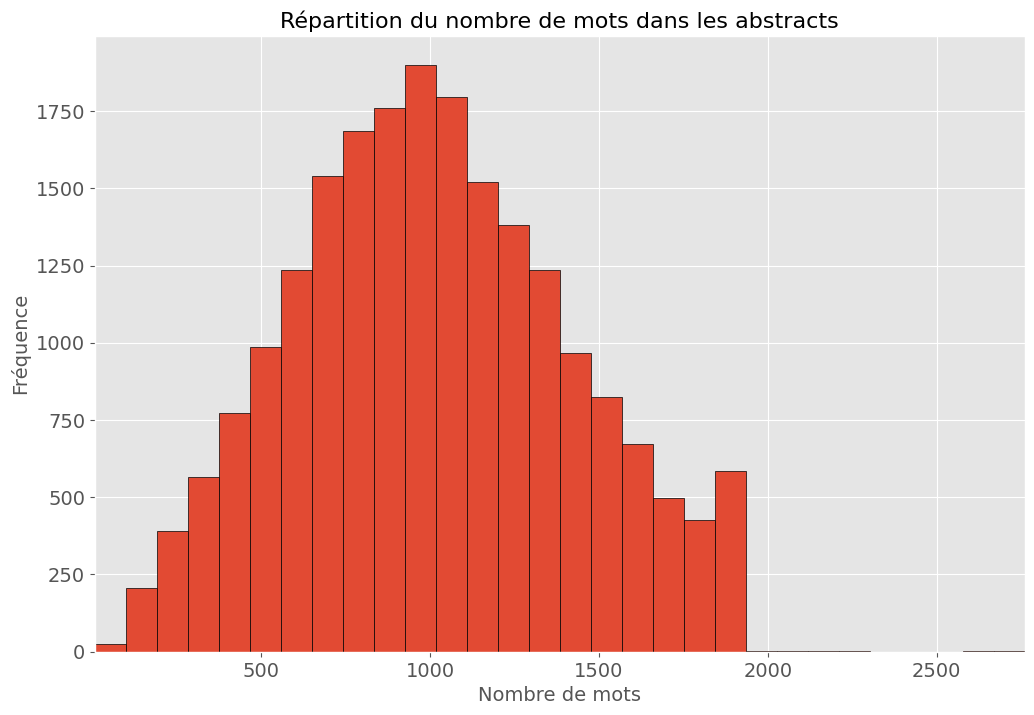

In [7]:
# Répartition Nb de mots dans les abstracts

import matplotlib.pyplot as plt
abstract_word = df['abstract_word'] = df['ABSTRACT'].apply(len)

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 8))
plt.hist(abstract_word, bins=30, edgecolor='black')
plt.title('Répartition du nombre de mots dans les abstracts', fontsize=16)
plt.xlabel('Nombre de mots', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.grid(True)
plt.xlim([min(abstract_word), max(abstract_word)])
plt.ylim([0, plt.ylim()[1]])


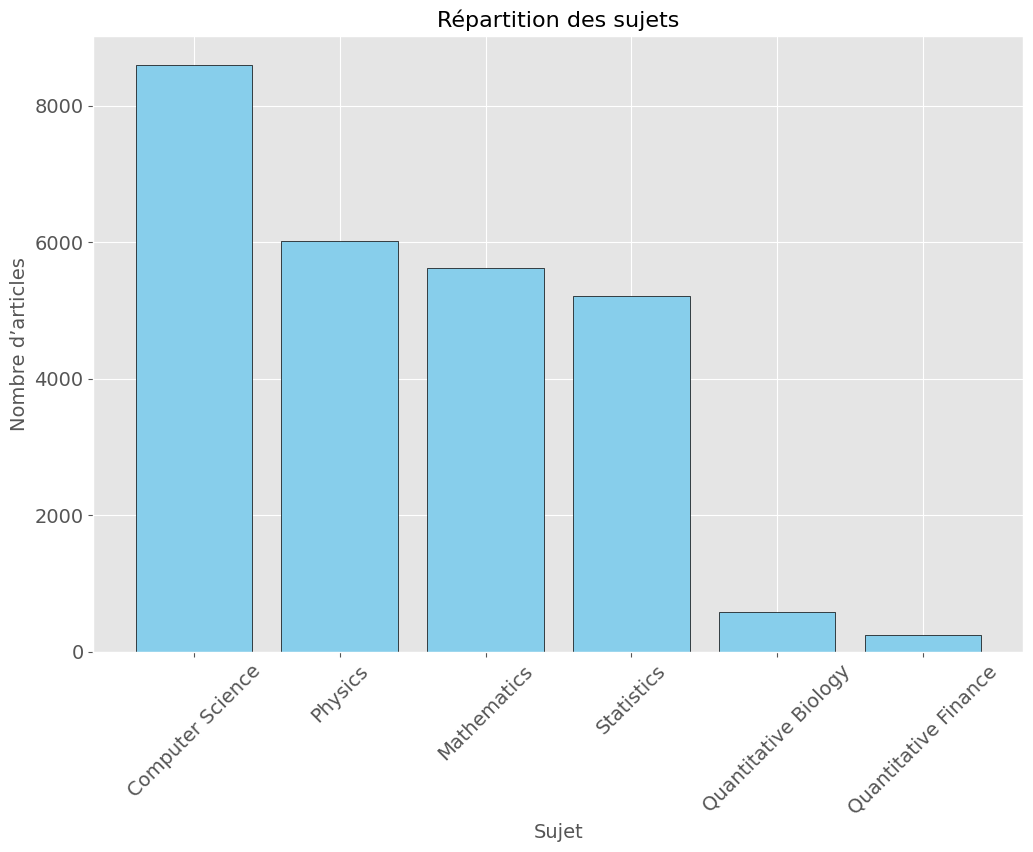

In [8]:
# Répartition des sujets

subjects = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
subject_counts = {subject: df[subject].sum() for subject in subjects}

subject_counts_df = pd.DataFrame(list(subject_counts.items()), columns=['Subject', 'Count'])

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 8))
plt.bar(subject_counts_df['Subject'], subject_counts_df['Count'], color='skyblue', edgecolor='black')
plt.title('Répartition des sujets', fontsize=16)
plt.xlabel('Sujet', fontsize=14)
plt.ylabel('Nombre d’articles', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Traîtement des données

import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install swifter
import swifter

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

# Le dataset contient des abréviations, des mots courts en majuscules et des caractères spéciaux

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r'\b(e\.g\.|i\.e\.)\b', lambda mo: mo.group(0).replace('.', ''), w)
    w = re.sub(r'([?.!,¿])', r' \1 ', w)
    w = re.sub(r'[" "]+', ' ', w)
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words and len(mot) > 1]

    return ' '.join(mots).strip()

df['cleaned'] = df.ABSTRACT.swifter.apply(lambda x :preprocess_sentence(x))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df['cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Pandas Apply:   0%|          | 0/20972 [00:00<?, ?it/s]

0    predictive models allow subject-specific inference analyzing disease related alterations neuroimaging data given subject 's data inference made two levels global identifiying condition presence subject local detecting condition effect individual measurement extracted subject 's data global inference widely used local inference used form subject-specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named rsm improve subject-specific detections predictive modeling approaches particular binary classifiers rsm specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper-type algorithm used different binary classifiers diagnostic manner without information condition presence reconstruction posed maximum-a-posteriori problem prior model whose parameters estimated training data classifier-specific fashion experimental eva

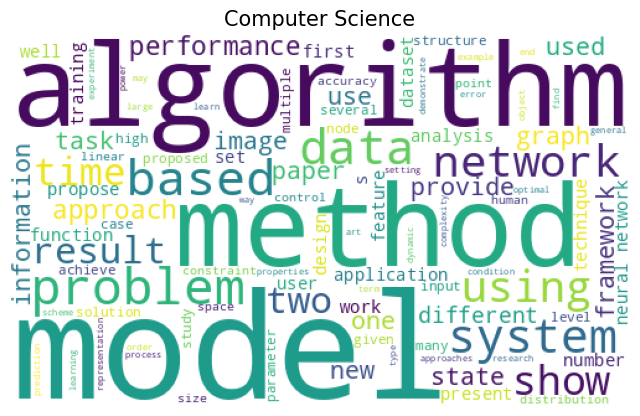

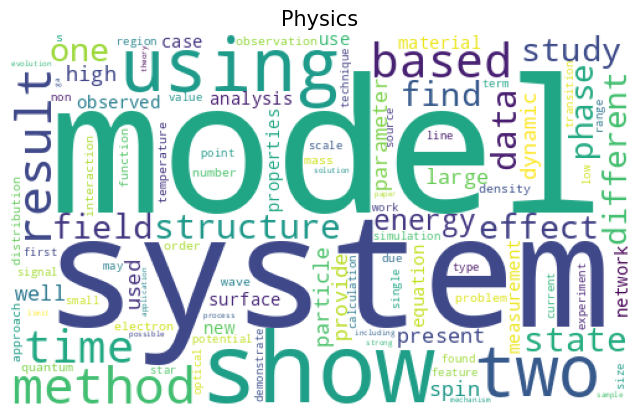

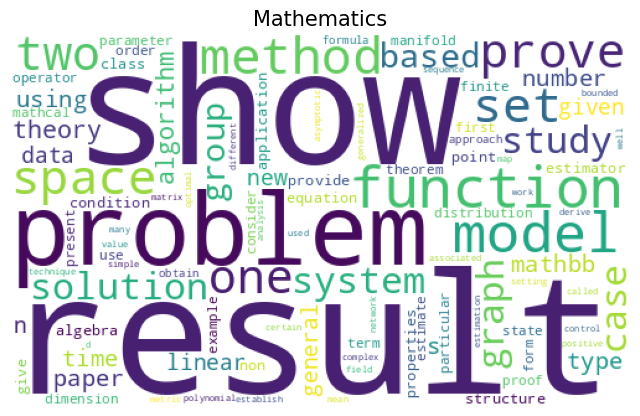

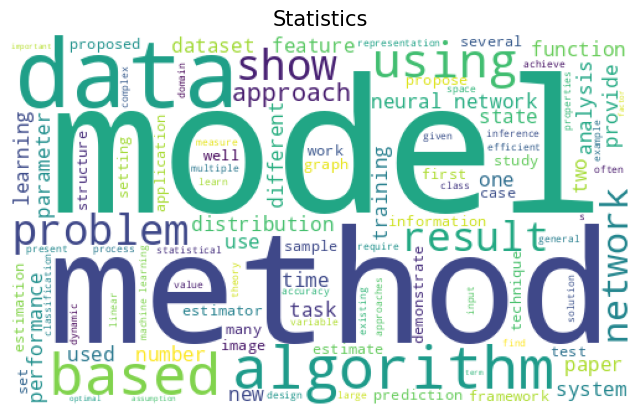

In [14]:
# Wordcloud des sujets les plus représentés

from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(df, category, title='', sample_size=1000):
    texts = df[df[category] == 1]['cleaned'].sample(min(sample_size, df[df[category] == 1].shape[0]))
    texts = " ".join(texts)

    wc = WordCloud(background_color="white", max_words=100, width=500, height=300, random_state=42).generate(texts)

    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.imshow(wc)
    plt.show()

categories = ['Computer Science', 'Physics', 'Mathematics', 'Statistics']
for category in categories:
    show_wordcloud(df, category, title=category)


On remarque sans surprise que les termes fréquents concernent le vocabulaire de la recherche scientifique: method, approach, problem, data, show/result/effect

In [18]:
# Word embedding

# Liste des n-grams à remplacer par un seul mot
n_grams = ['data scientist', 'data engineer', 'data analyst', 'machine learning', 'deep learning', 'artificial intelligence']

def replace_ngrams(text, n_grams):
    for n_gram in n_grams:
        text = text.replace(n_gram, n_gram.replace(' ', ''))
    return text

from gensim.models import Word2Vec

w2v_model = Word2Vec(window=2, min_count=2, vector_size=100, sg=0, sample=6e-5, negative=20)

sentences = [str(line).split() for line in df['cleaned']]
w2v_model.build_vocab(sentences, progress_per=10000)

df['cleaned'] = df['cleaned'].apply(lambda x: replace_ngrams(x, n_grams))

In [19]:
# Vérifier que 'datascientist' est présent

if 'datascientist' in w2v_model.wv.key_to_index:
    print("'datascientist' est dans le vocabulaire.")
else:
    print("'datascientist' n'est pas dans le vocabulaire.")

'datascientist' est dans le vocabulaire.


In [20]:
# Entraînement du modèle

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30)


(37386430, 57071250)

In [21]:
# Afficher les mots les plus proches de AI

print('Most similar words of \'artificalintelligence\': ')
print(w2v_model.wv.most_similar(positive=["artificialintelligence"]))

Most similar words of 'artificalintelligence': 
[('ai', 0.7385606169700623), ('fairer', 0.7110028266906738), ('explainable', 0.7063109278678894), ('realm', 0.6954118013381958), ('successes', 0.6796658039093018), ('hit-ai', 0.6780831217765808), ('breakthroughs', 0.6724725961685181), ('robotics', 0.662953794002533), ('transformative', 0.6613366007804871), ('human-in-the-loop', 0.6433184146881104)]


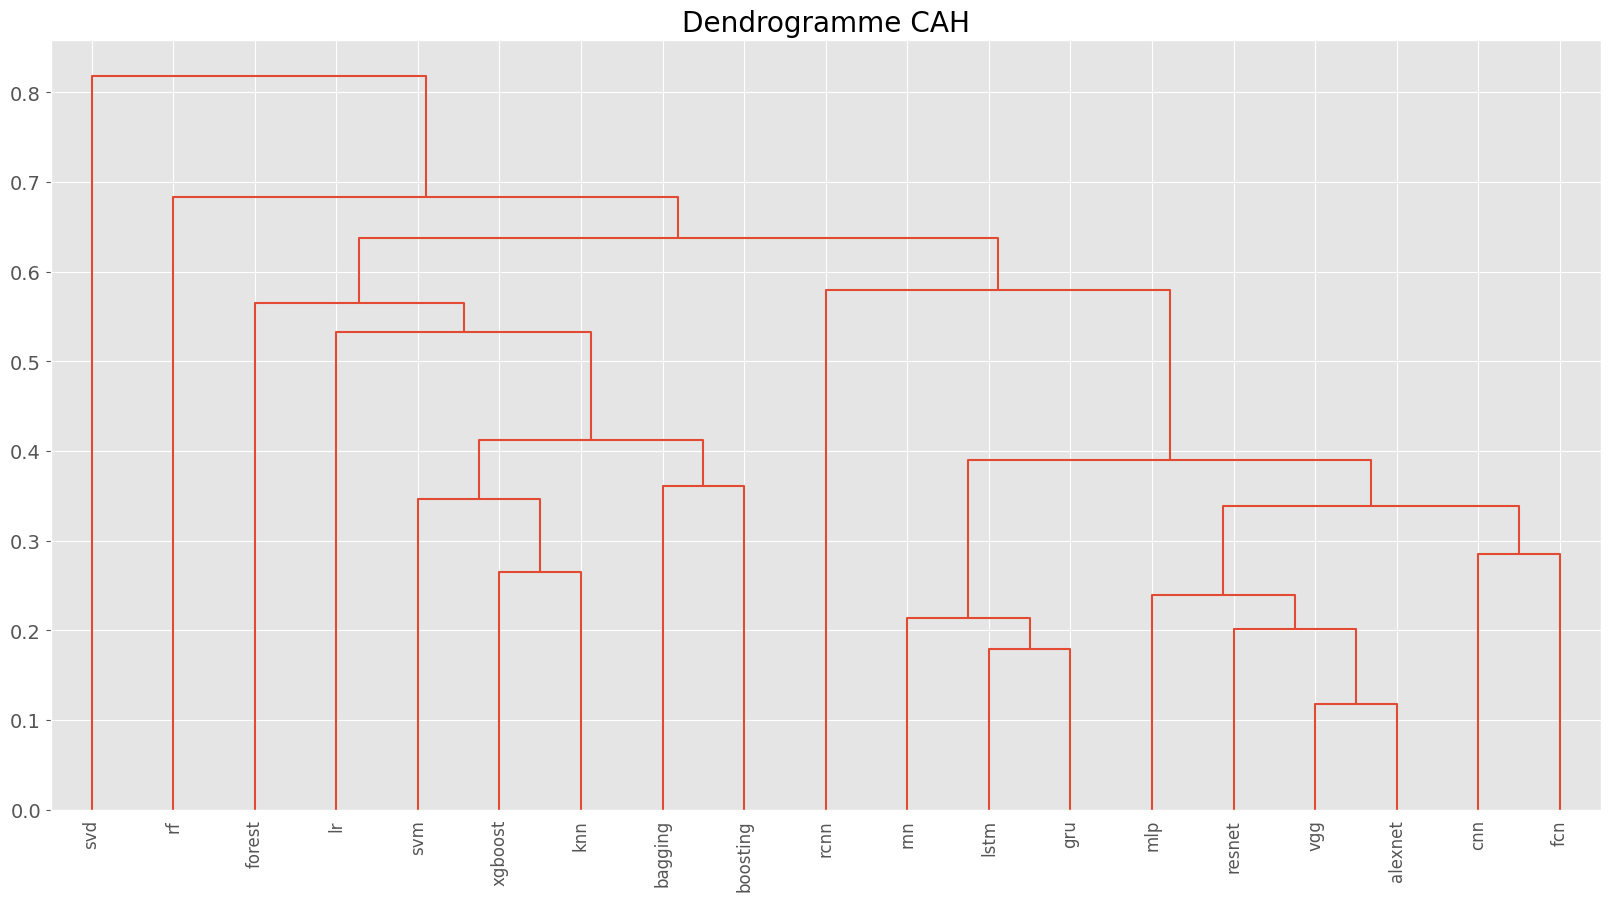

In [22]:
# Vérifier si clusters sont cohérents

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

liste_mots = ['mlp', 'cnn', 'rnn', 'lstm', 'gru', 'vgg', 'fcn', 'rcnn', 'resnet', 'alexnet', 'bagging', 'boosting', 'forest', 'xgboost', 'knn', 'svd', 'rf', 'lr', 'svm']
matrix = []
missing_words = []
for word in liste_mots:
    try:
        matrix.append(w2v_model.wv[word])
    except KeyError:
        missing_words.append(word)

if not missing_words:
    matrix = np.array(matrix, dtype=float)
    plt.figure(figsize=(20, 10))

    Z = linkage(matrix, method='average', metric='cosine')

    plt.title("Dendrogramme CAH")
    dendrogram(Z, labels=liste_mots, leaf_rotation=90., color_threshold=0)
    plt.show()
else:
    print(f"Les mots suivants sont manquants dans le modèle et seront ignorés : {missing_words}")


In [23]:
# Trouver 10 grandes thématiques

from sklearn.cluster import KMeans
import numpy as np

num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(w2v_model.wv.vectors)

word_centroid_list = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    closest_words_indices = word_centroid_list[i, :10]
    closest_words = [w2v_model.wv.index_to_key[index] for index in closest_words_indices]
    print(f"Thématique {i+1}: {closest_words}")

Thématique 1: ['new', 'random', 'methods', 'parameters', 'network', 'results', 'phase', 'also', 'obtained', 'many']
Thématique 2: ['random', 'several', 'two', 'new', 'method', 'many', 'performance', 'show', 'parameters', 'also']
Thématique 3: ['one', 'network', 'several', 'properties', 'methods', 'linear', 'dynamics', 'new', 'demonstrate', 'obtained']
Thématique 4: ['however', 'properties', 'obtained', 'given', 'linear', 'well', 'demonstrate', 'structure', 'results', 'dynamics']
Thématique 5: ['random', 'experiments', 'several', 'method', 'functions', 'local', 'field', 'numerical', 'also', 'however']
Thématique 6: ['dynamics', 'one', 'well', 'properties', 'methods', 'structure', 'time', 'large', 'given', 'present']
Thématique 7: ['linear', 'dynamics', 'number', 'result', 'space', 'network', 'obtained', 'one', 'properties', 'complex']
Thématique 8: ['result', 'performance', 'experiments', 'also', 'method', 'present', 'conditions', 'random', 'algorithm', 'functions']
Thématique 9: ['seve

 Les résultats réflètent la nature interdisciplinaire des recherches en sciences, où les méthodes et les concepts peuvent être appliqués à plusieurs problèmes différents.

In [25]:
# Embedding pour représenter chaque phrase

import numpy as np
from nltk.tokenize import sent_tokenize

data = []

for abstract in df['cleaned']:
    sentences = sent_tokenize(abstract)  # abstracts en phrases
    abstract_vectors = []

    for sentence in sentences:
        words = sentence.split()
        sentence_vector = np.zeros(w2v_model.wv.vector_size, dtype=np.float32)
        num_words = 0

        for word in words:
            if word in w2v_model.wv.key_to_index:
                sentence_vector += w2v_model.wv[word]
                num_words += 1

        if num_words > 0:
            sentence_vector /= num_words

        abstract_vectors.append(sentence_vector)

    if abstract_vectors:
        abstract_vector = np.mean(abstract_vectors, axis=0)
        data.append(abstract_vector)

data = np.array(data)
print(f"La forme de data est : {data.shape}")




La forme de data est : (20972, 100)


La forme de data est : (20972, 100)


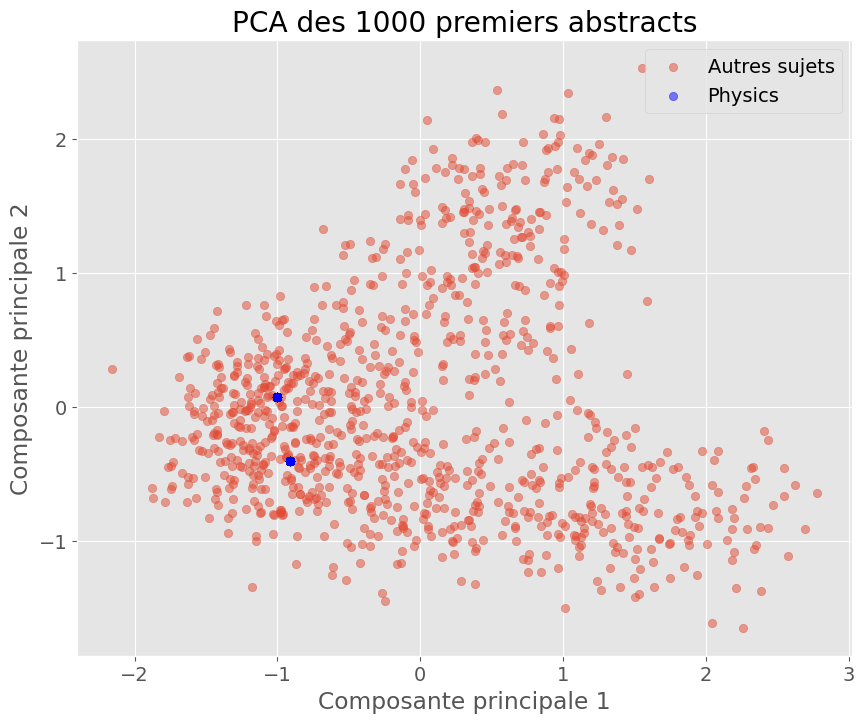

In [28]:
# Réduire les embeddings en 2 dimensions

from sklearn.decomposition import PCA

def document_vector(word2vec_model, doc):
    # Diviser le document en phrases
    sentences = sent_tokenize(doc)
    sentence_vectors = []

    for sentence in sentences:
        words = [word for word in sentence.split() if word in word2vec_model.wv]
        if len(words) > 0:
            sentence_vectors.append(np.mean(word2vec_model.wv[words], axis=0))

    if len(sentence_vectors) == 0:
       return np.zeros(word2vec_model.vector_size)
    else:
       return np.mean(sentence_vectors, axis=0)

data = np.array([document_vector(w2v_model, abstract) for abstract in df['cleaned']])
print(f"La forme de data est : {data.shape}")

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[:1000])

physics_bool_array = df['Physics'][:1000]

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, label='Autres sujets')
plt.scatter(pca_result[physics_bool_array, 0], pca_result[physics_bool_array, 1], color='blue', alpha=0.5, label='Physics')
plt.title('PCA des 1000 premiers abstracts')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()


In [29]:
# Solution non-supervisée pour classer les articles

from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    labels[mask] = mode(df['Physics'][mask])[0]

    from sklearn.metrics import confusion_matrix, accuracy_score

mat = confusion_matrix(df['Physics'], labels)
acc = accuracy_score(df['Physics'], labels)

print("Matrice de confusion :\n", mat)
print("\nAccuracy :", acc)

Matrice de confusion :
 [[14072   887]
 [ 1494  4519]]

Accuracy : 0.8864676711806218


In [31]:
# Système de recommandation simple retournant les 5 abstracts les plus proches d'un abstract.

from sklearn.metrics.pairwise import cosine_similarity

def find_closest_articles(article_embedding, other_embeddings, k=5):
    similarities = cosine_similarity(article_embedding.reshape(1, -1), other_embeddings)
    closest_indices = np.argsort(similarities[0])[::-1][:k]
    return closest_indices

def get_abstracts_from_indices(df, indices):
    return df.iloc[indices]['cleaned']

demo_index = 0

demo_article_embedding = data[demo_index]

closest_articles_indices = find_closest_articles(demo_article_embedding, data, k=5)

print("Abstract de démonstration :")
print(df.iloc[demo_index]['cleaned'])

print("\n5 Abstracts les plus proches :")
for i, index in enumerate(closest_articles_indices, start=1):
    print(f"\nAbstract proche {i}:")
    print(df.iloc[index]['cleaned'])

Abstract de démonstration :
predictive models allow subject-specific inference analyzing disease related alterations neuroimaging data given subject 's data inference made two levels global identifiying condition presence subject local detecting condition effect individual measurement extracted subject 's data global inference widely used local inference used form subject-specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named rsm improve subject-specific detections predictive modeling approaches particular binary classifiers rsm specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper-type algorithm used different binary classifiers diagnostic manner without information condition presence reconstruction posed maximum-a-posteriori problem prior model whose parameters estimated training data classifier-specific f

Les résultats montrent que le système de recommandation fonctionne bien en termes d'identification de la similarité sémantique et thématique entre les documents. Mais nous pourrions exclure automatiquement l'article de référence des résultats (Abtract proche 1).